### Importing necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


### Reading the training and testing dataset files

In [2]:
X_train = pd.read_csv('../Data/X_Training_Can.csv')
X_test = pd.read_csv('../Data/X_Testing_Can.csv')

y_train = pd.read_csv('../Data/y_Training_Can.csv')
y_test = pd.read_csv('../Data/y_Testing_Can.csv')

### Features to keep

In [3]:
# feat2keep = ['longitude', 'beds', 'baths', 'sq_feet' ,'lease_term_6 months',
#  'lease_term_Negotiable' ,'lease_term_Short Term', 'type_Basement',
#  'type_Condo Unit' ,'type_House','type_Room For Rent', 'type_Townhouse',
#  'smoking_Smoking Allowed' ,'province_British Columbia', 'province_Manitoba',
#  'province_Newfoundland and Labrador' ,'province_Nova Scotia',
#  'province_Ontario', 'province_Quebec', 'province_Saskatchewan']

# feat2keep = ['longitude', 'beds', 'baths', 'sq_feet', 'lease_term_6 months',
#  'lease_term_Short Term' ,'type_Basement' ,'type_House' ,'type_Room For Rent',
#  'province_British Columbia' ,'province_Manitoba',
#  'province_Newfoundland and Labrador' ,'province_Ontario', 'province_Quebec',
#  'province_Saskatchewan']

# feat2keep = ['longitude' ,'sq_feet', 'type_Basement' ,'type_Room For Rent',
#  'province_Manitoba']
# feat2keep = ['baths','beds','type_House','province_Ontario'	,'longitude',
# 'sq_feet','province_Manitoba','province_Saskatchewan',
# 'type_Basement','type_Room For Rent','latitude', 'lease_term_6 months',
#             'lease_term_Short Term', 'province_Northwest Territories',
#             'cats','dogs']


#feat2keep = ['baths','beds','type_House','province_Ontario'	,'longitude',
#'sq_feet','province_Saskatchewan',
#'type_Basement','type_Room For Rent','latitude', ]


#feat2keep = ['beds','sq_feet', 'type_Basement', 'type_House', 'type_Room For Rent',
# 'city_Blackfalds', 'city_Bonnyville', 'city_Camrose', 'city_Edmonton',
# 'city_Grande Prairie', 'city_Lethbridge', 'city_Medicine Hat',
# 'city_Sherwood Park', 'city_St. Albert', 'city_Sylvan Lake', 'type_Basement', 'type_Condo Unit', 'type_House', 'lease_term_Negotiable','baths']
#['beds', 'baths', 'sq_feet', 'cats', 'dogs', 'lease_term_Negotiable',
# 'type_Basement', 'type_Condo Unit', 'type_House', 'type_Room For Rent', 'city']


feat2keep = ['baths','beds','type_House','longitude', 'sq_feet', 'type_Basement','type_Room For Rent','latitude', 'province_Ontario', 'province_Saskatchewan']

X_train = X_train[feat2keep]
X_test = X_test[feat2keep]

### Train the model on training dataset

In [4]:
# Define X and y
X = pd.concat([X_train,X_test])
y = pd.concat([y_train, y_test])

# Add a constant
X = sm.add_constant(X)

# Create and fit the model
model = sm.OLS(y, X).fit()

### Investigate trend (linear, polynomial, logarithmic, ...)

<Figure size 2000x2000 with 0 Axes>

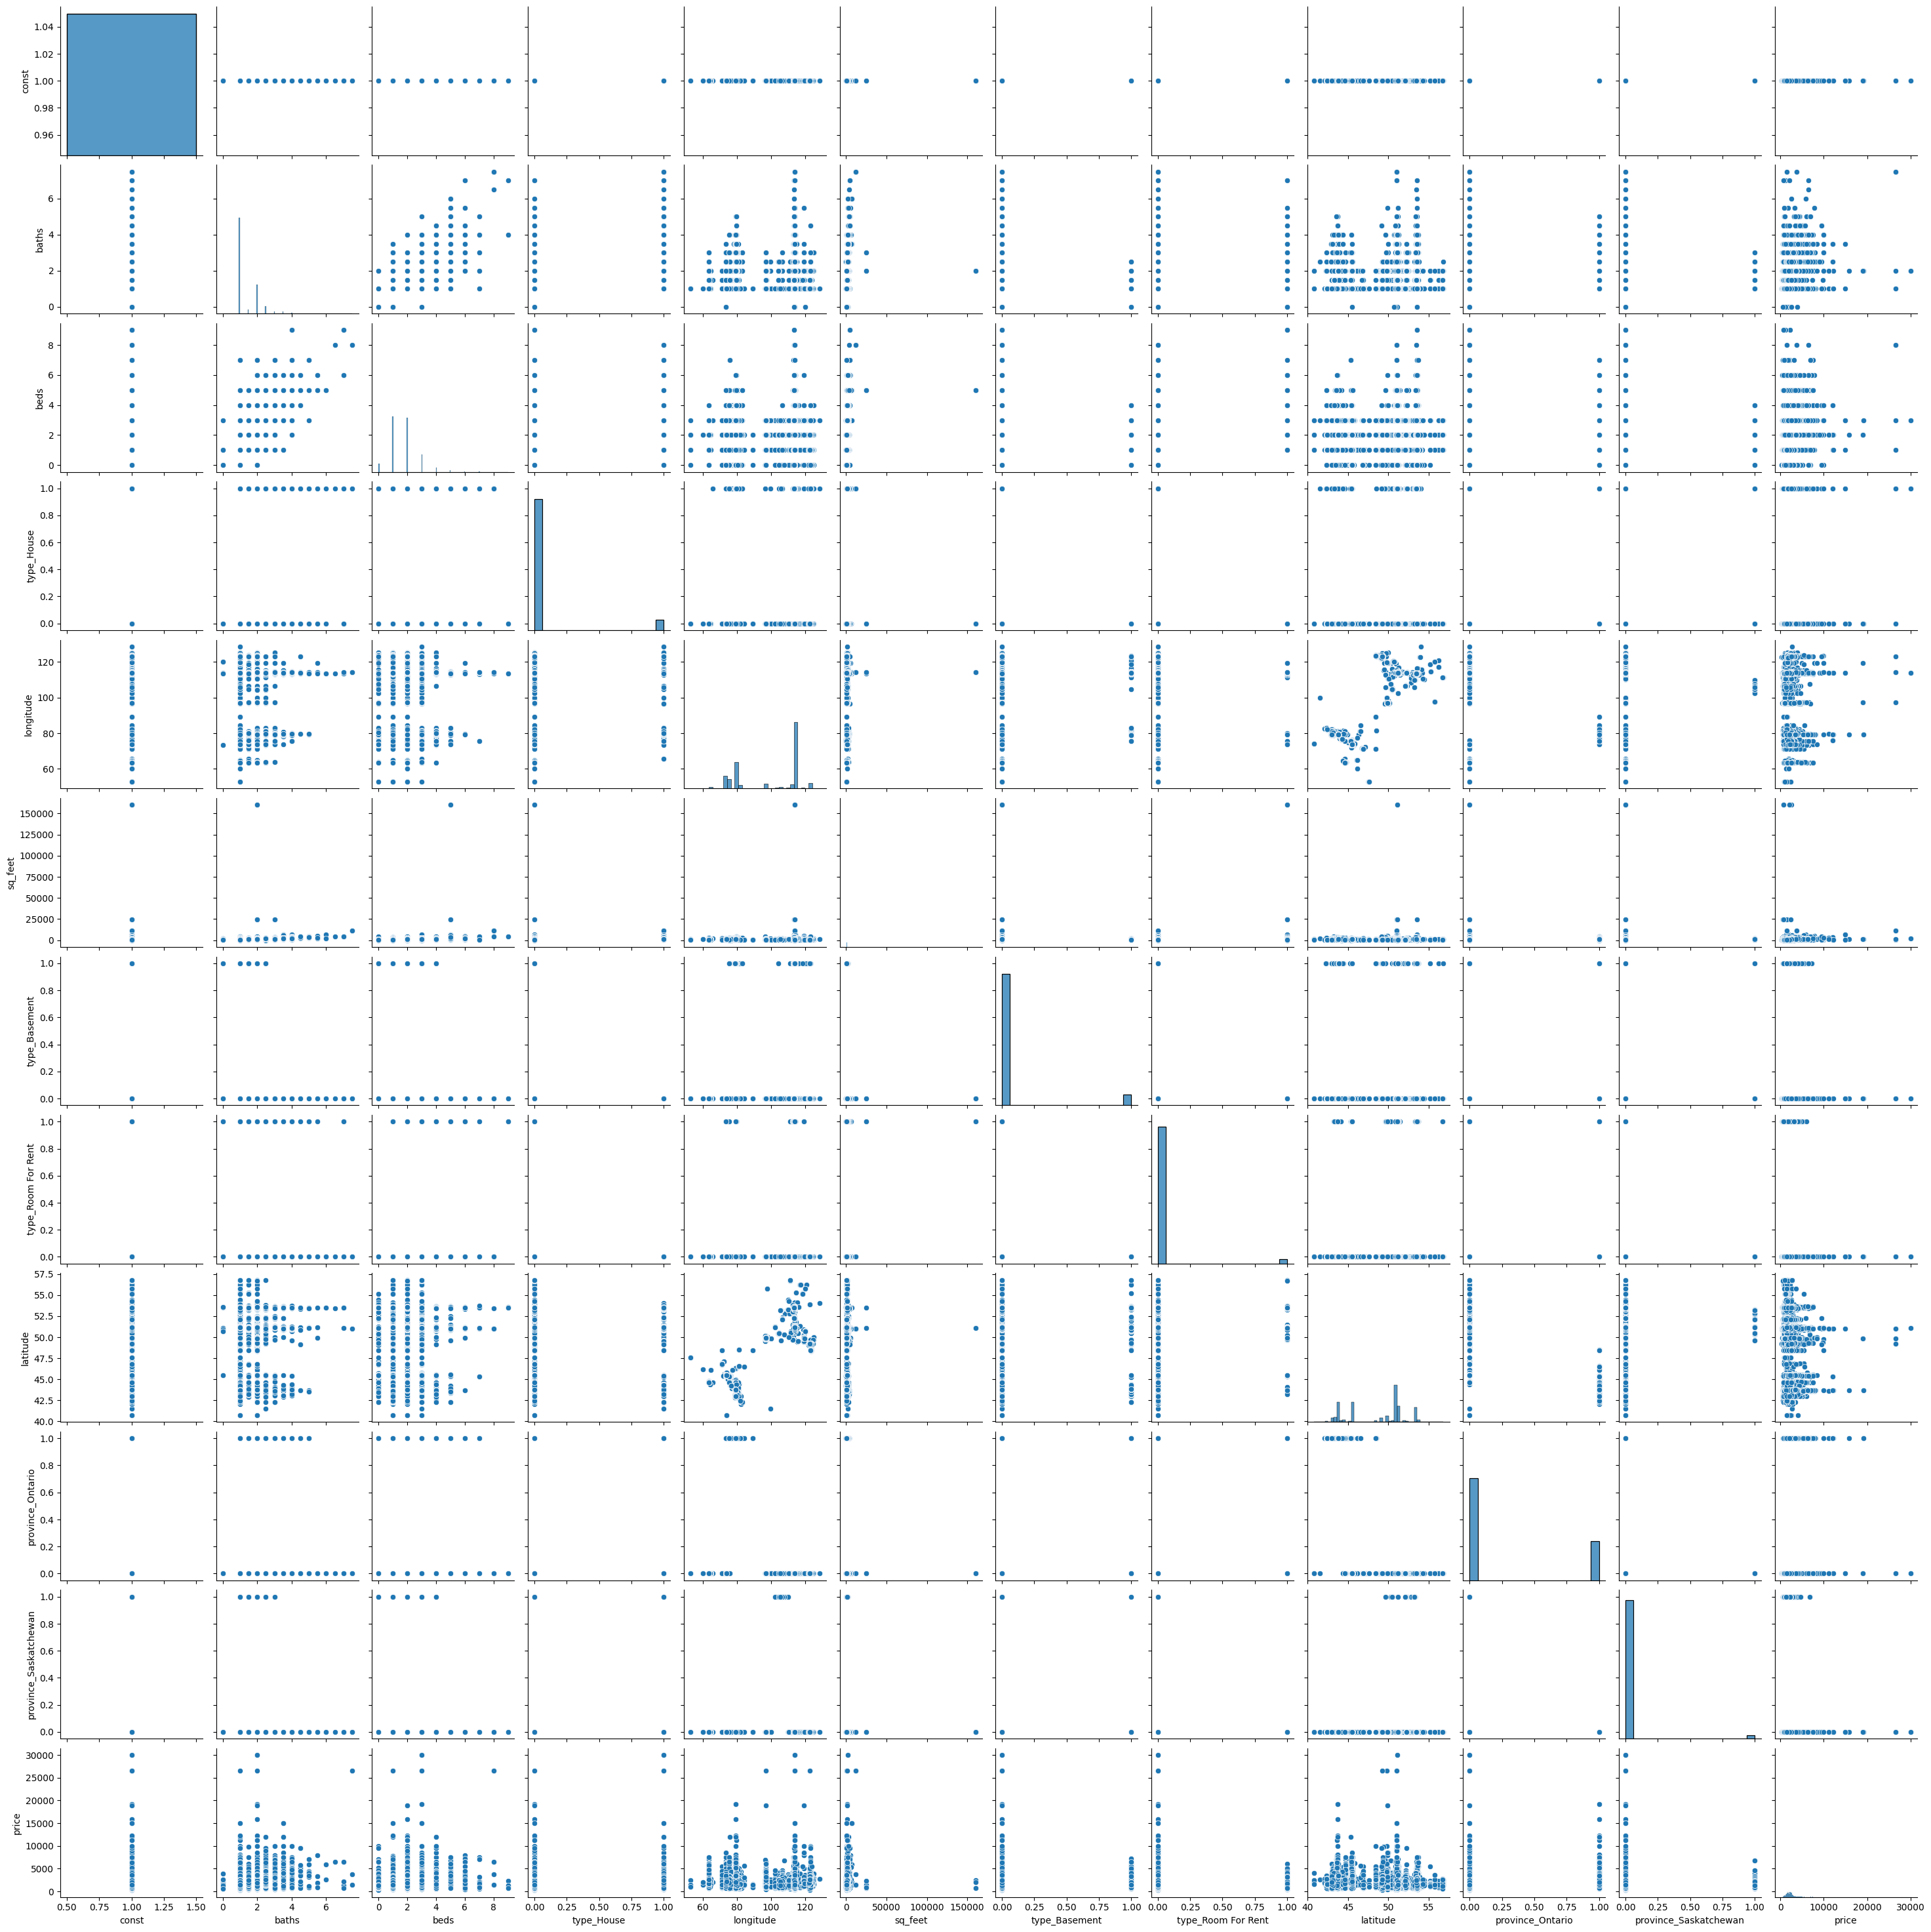

In [5]:
# Investigate the correlation to determine most valuable columns for prediction
# Create plot and adjust its size
plt.figure( figsize=(20, 20))

# Create paired plot
ax = sns.pairplot(X.join(y))

# Saving the plot t be able to zoom in
plt.savefig('../Graph/SLR_paiplot_train.png')

# Show plot
plt.show()

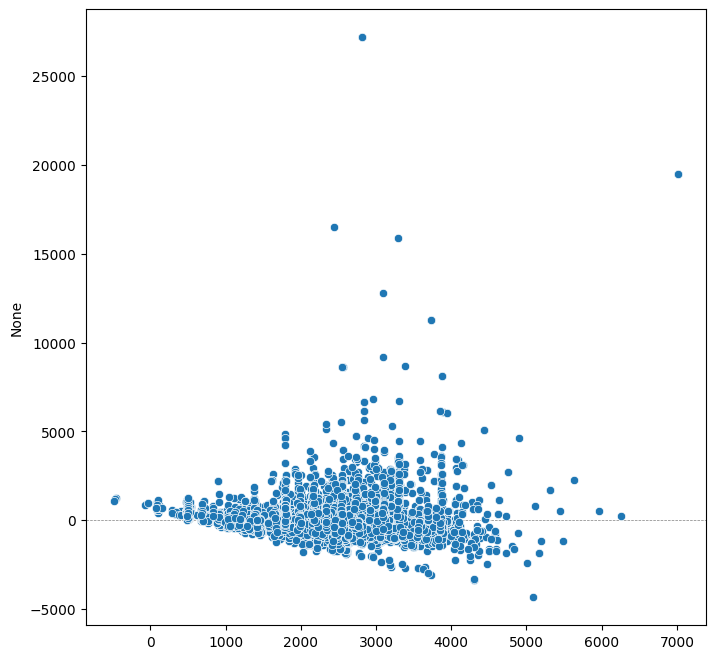

In [6]:
# Residual plot

# Create figure and adjust size
plt.figure(figsize = (8, 8))

# Add scatter plot
ax = sns.scatterplot(x=model.predict(), y=model.resid, zorder=3)

# Add grid y-axis line at 0
ax.axhline(0, linestyle='--', color='gray', zorder=0, linewidth=0.5)

In [7]:
# Summary

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     1783.
Date:                Sun, 23 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:52:35   Log-Likelihood:            -1.7882e+05
No. Observations:               22360   AIC:                         3.577e+05
Df Residuals:                   22349   BIC:                         3.578e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7137.4401    142.483     50.093      0.000    6858.164    7416.716
baths                   562.5967     11.012     51.089      0.000     541.012     584.181
beds                    196.0789      7.126     27.517      0.000     182.112     210.046
type_House               59.7417     22.762      2.625      0.009      15.127     104.357
longitude                17.4055      0.605     28.778      0.000      16.220      18.591
sq_feet                   0.0116      0.003      3.771      0.000       0.006       0.018
type_Basement          -350.0928     19.259    -18.178      0.000    -387.842    -312.344
type_Room For Rent    -1292.9090     28.098    -46.015      0.000   -1347.982   -1237.836
latitude               -158.7230      3.713    -42.748      0.000    -166.001    -151.445
province_Ontario        -17.0116     18.389     -0.925      0.355     -53.056      19.032
province_Saskatchewan  -367.3151     31.972    -11.489      0.000    -429.982    -304.649
==============================================================================
Omnibus:                    35899.998   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         71486901.732
Skew:                          10.054   Prob(JB):                         0.00
Kurtosis:                     279.271   Cond. No.                     5.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
sm.stats.stattools.durbin_watson(model.resid)

np.float64(1.9970642537172227)

In [ ]:
# Residual plot

# Create subplots and adjust their size
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (8*2, 8))

# Add scatter plot
sns.scatterplot(x=model.predict(), y=model.resid, zorder=3, ax = ax1)

# Add legend to ax1
ax1.set_title('Residual plot')

# Add grid y-axis line at 0
ax1.axhline(0, linestyle='--', color='gray', zorder=0, linewidth=0.5)

# Add QQ plot
stats.probplot(model.resid, dist="norm", plot=ax2);

# Add grid y-axis line at 0
ax2.axhline(0, linestyle='--', color='gray', zorder=0, linewidth=0.5)

# Add legend to ax2
ax2.set_title('QQ plot')

Text(0.5, 1.0, 'QQ plot')

In [ ]:
# Compute RMSE using model.resid


mae = np.mean(abs(model.resid))

mse = np.mean(model.resid ** 2)

rmse = np.sqrt(np.mean(model.resid ** 2))



print(f'The Mean Absolute Error = {mae:.0f}\n\
The Mean Square Error = {mse:.0f}\n\
The Root Mean Square Error = {rmse:.0f}\n ')

In [ ]:
X.iloc[y[y['price']> 10000].index,:].join(y[y['price']> 10000])
